<H1>INFOSYS SPRINGBOARD - BREAST CANCER DETECTION USING ADABOOST CLASSIFIER PROJECT</H1>
<H4>Installing the necesssary libraries</H4>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, auc, RocCurveDisplay
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns


<h2>DATA PREPROCESSING</h2>

<h3>Data Collection</h3><h4>Reading the CSV file and naming the Columns</h4>

In [2]:
columns = ['ID', 'Diagnosis'] + ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']
data= pd.read_csv(r"D:\JAYAM\INFOSYS\Datasets\breast+cancer+wisconsin+diagnostic\wdbc.data",header=None,names=columns)

<h4><b>head()</b> is used to display the top 5 rows in the datasets</h4>

In [3]:
data.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<h4><b>tail()</b> is used to display the bottom 5 rows in the dataset</h4>

In [4]:
data.tail()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


<h3>ENCODING CATEGORICAL LABELS</h3>

In [5]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

<h4>Shape of dataset</h4>

In [6]:
data.shape

(569, 32)

<h4>Summary of Dataset</h4>

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

<h3>Checking Null values

In [8]:
data.isnull().sum()

ID                         0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<h3>Statistical Information for numerical columns in dataset

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
Diagnosis,569.0,3.725835e-01,4.839180e-01,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01


<h3>Checking Unique values

In [10]:
unique_columns=data.nunique()
print(unique_columns)

ID                         569
Diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave_points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave_points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave_points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

<h3>Checking Duplicated values

In [11]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"Number of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")

Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


<h2>Data visualization

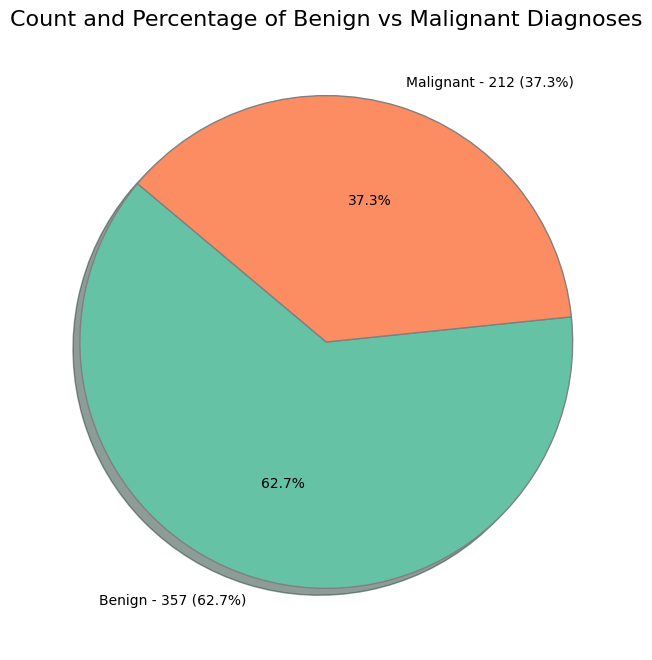

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
datar=data.copy()
# Map 1 to "Malignant" and 0 to "Benign"
datar['Diagnosis'] = datar['Diagnosis'].map({1: 'Malignant', 0: 'Benign'})

# Calculate counts and prepare labels with counts and percentages
counts = datar['Diagnosis'].value_counts()
labels = [f'{label} - {count} ({count / sum(counts) * 100:.1f}%)' for label, count in zip(counts.index, counts)]

# Use a color palette for distinct colors
colors = sns.color_palette("Set2", len(counts))

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts,
    labels=labels,
    autopct='%1.1f%%',       # Show percentage on each slice
    startangle=140,          # Rotate for better readability
    colors=colors,           # Apply color palette
    wedgeprops={'edgecolor': 'gray'},  # Edge around slices
    shadow=True              # Add shadow for 3D effect
)

plt.title("Count and Percentage of Benign vs Malignant Diagnoses", fontsize=16)
plt.show()


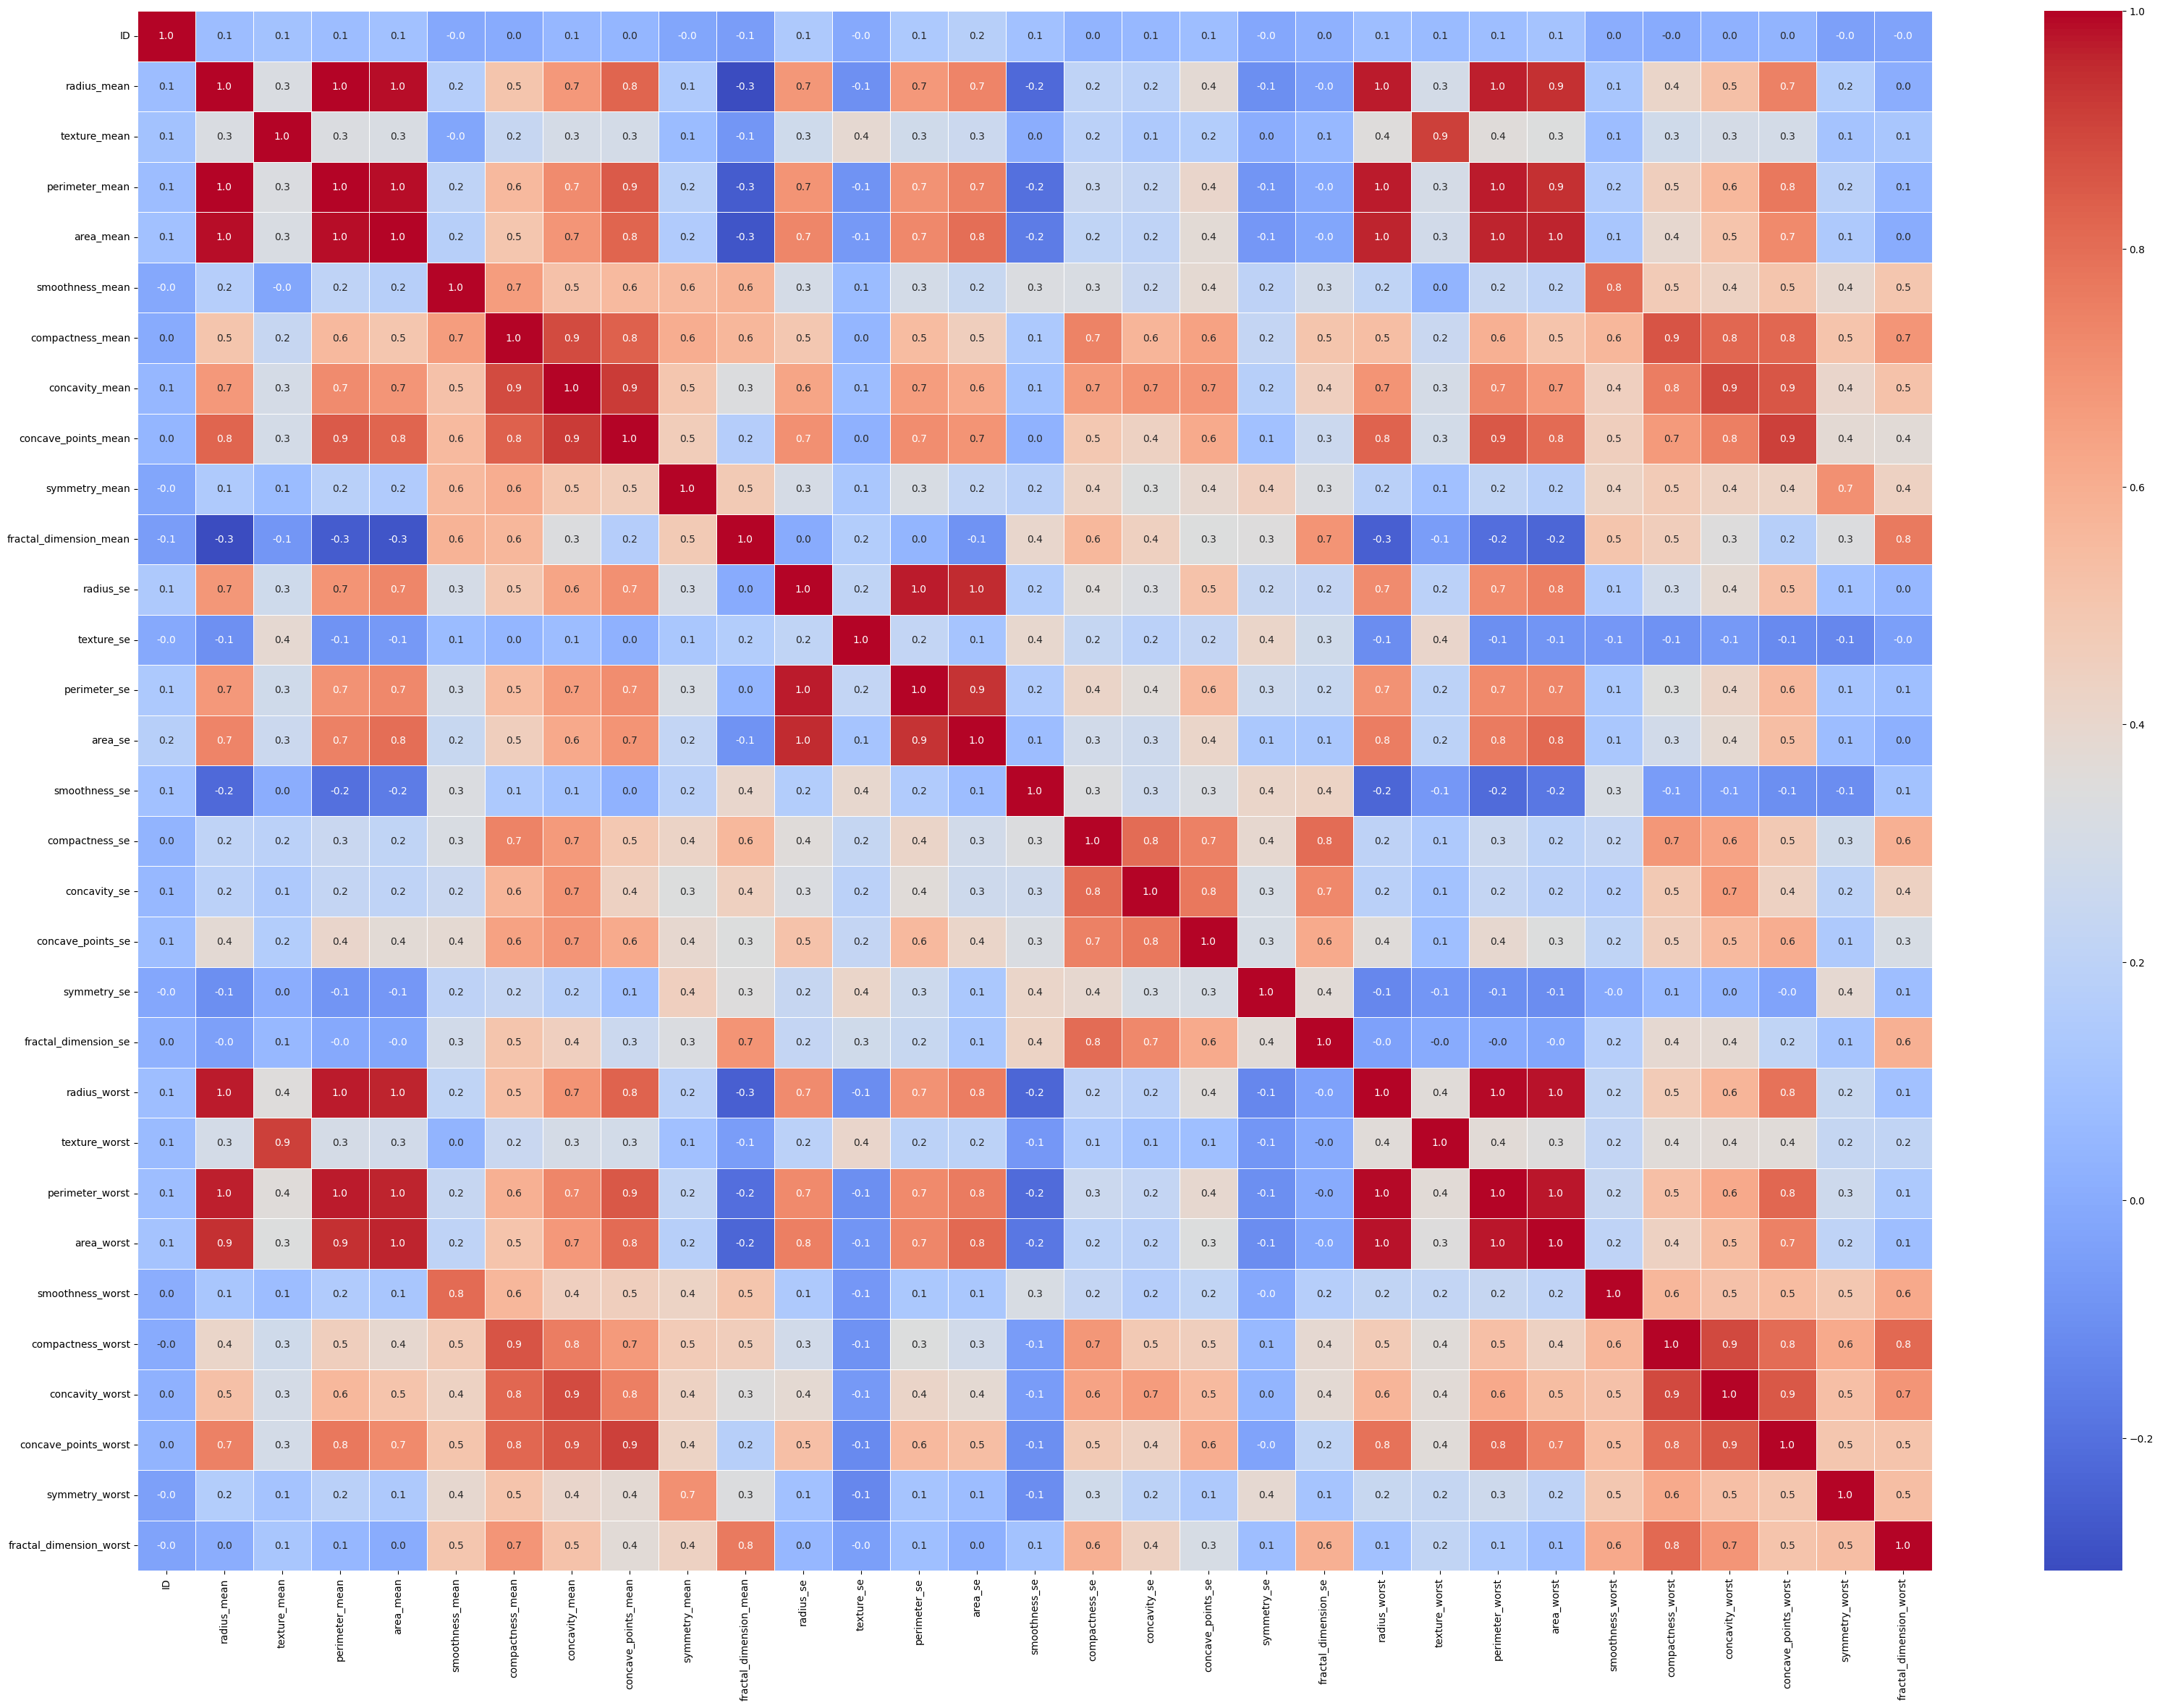

In [13]:
plt.figure(figsize=(40, 28))

# Generate the heatmap for correlation matrix with annotations
sns.heatmap(data.drop('Diagnosis',axis=1).corr(), annot=True, cmap='coolwarm', fmt='.01f', linewidths=0.5)

# Show the plot
plt.show()

<h3>Outlier Detection

In [14]:
data_imputed = data.copy()

In [15]:
# Select only numeric columns for processing
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Copy the dataset for imputation
data_imputed = data.copy()

# Calculate Q1, Q3, and IQR for numeric columns
Q1 = data_imputed[numeric_cols].quantile(0.25)
Q3 = data_imputed[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Replace outliers with the median of the column
for column in numeric_cols:
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    
    # Replace values outside bounds with the median of the column
    data_imputed[column] = data_imputed[column].mask(
        (data_imputed[column] < lower_bound) | (data_imputed[column] > upper_bound),
        data_imputed[column].median()
    )


In [16]:
# Prepare features and target variable for both original and imputed datasets
X_original = data.drop(columns=['ID', 'Diagnosis'])  # Features from original data (with outliers)
y_original = data['Diagnosis']  # Target variable from original data

X_imputed = data_imputed.drop(columns=['ID', 'Diagnosis'])  # Features from imputed data (outliers handled)
y_imputed = data_imputed['Diagnosis']  # Target variable remains the same

datavif= data.drop(columns=['ID'])

In [17]:
print("X_original shape:", X_original.shape)
print("y_original shape:", y_original.shape if y_original is not None else "Not found")
print("X_imputed shape:", X_imputed.shape)
print("y_imputed shape:", y_imputed.shape if y_imputed is not None else "Not found")

X_original shape: (569, 30)
y_original shape: (569,)
X_imputed shape: (569, 30)
y_imputed shape: (569,)


<h3>Scaling the Data

In [18]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the original features
X_original_scaled = scaler.fit_transform(X_original)

# Scale the imputed features
X_imputed_scaled = scaler.fit_transform(X_imputed)


<h3>VIF Implementation

In [19]:
# Calculate VIF for the original data (with outliers)
X_original_const = add_constant(X_original)  # Add constant for VIF calculation
vif_original = pd.DataFrame()
vif_original['Feature'] = X_original_const.columns
vif_original['VIF'] = [variance_inflation_factor(X_original_const.values, i)
                       for i in range(X_original_const.shape[1])]

# Display VIF for original data
print("VIF for original data (with outliers):")
print(vif_original)

# Calculate VIF for the imputed data (outliers replaced with median)
X_imputed_const = add_constant(X_imputed)  # Add constant for VIF calculation
vif_imputed = pd.DataFrame()
vif_imputed['Feature'] = X_imputed_const.columns
vif_imputed['VIF'] = [variance_inflation_factor(X_imputed_const.values, i)
                      for i in range(X_imputed_const.shape[1])]

# Display VIF for imputed data
print("\nVIF for imputed data (outliers replaced with median):")
print(vif_imputed)


VIF for original data (with outliers):
                    Feature          VIF
0                     const  1868.188844
1               radius_mean  3806.115296
2              texture_mean    11.884048
3            perimeter_mean  3786.400419
4                 area_mean   347.878657
5           smoothness_mean     8.194282
6          compactness_mean    50.505168
7            concavity_mean    70.767720
8       concave_points_mean    60.041733
9             symmetry_mean     4.220656
10   fractal_dimension_mean    15.756977
11                radius_se    75.462027
12               texture_se     4.205423
13             perimeter_se    70.359695
14                  area_se    41.163091
15            smoothness_se     4.027923
16           compactness_se    15.366324
17             concavity_se    15.694833
18        concave_points_se    11.520796
19              symmetry_se     5.175426
20     fractal_dimension_se     9.717987
21             radius_worst   799.105946
22            text

In [20]:
selected_features=vif_original[vif_original['VIF']<10]['Feature']
X_selected = X_original[selected_features].copy()
print("\nSelected Features for selected data (VIF<10):")
print(selected_features)


Selected Features for selected data (VIF<10):
5          smoothness_mean
9            symmetry_mean
12              texture_se
15           smoothness_se
19             symmetry_se
20    fractal_dimension_se
29          symmetry_worst
Name: Feature, dtype: object


In [21]:
selected_features_imputed=vif_imputed[vif_imputed['VIF']<10]['Feature']
X_imputed_selected = X_imputed[selected_features_imputed].copy()
print("\nSelected Features for Imputed data (VIF<10):")
print(selected_features_imputed)


Selected Features for Imputed data (VIF<10):
2                texture_mean
5             smoothness_mean
6            compactness_mean
7              concavity_mean
9               symmetry_mean
10     fractal_dimension_mean
11                  radius_se
12                 texture_se
13               perimeter_se
14                    area_se
15              smoothness_se
16             compactness_se
17               concavity_se
18          concave_points_se
19                symmetry_se
20       fractal_dimension_se
22              texture_worst
24                 area_worst
25           smoothness_worst
26          compactness_worst
27            concavity_worst
29             symmetry_worst
30    fractal_dimension_worst
Name: Feature, dtype: object


<h2>Splitting the Dataset

In [22]:
# --- Splitting the data into training and testing sets (after VIF calculation) ---

# For the original data (selected features after VIF filtering)
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(
    X_selected, y_original, test_size=0.3, random_state=42
)

# For the imputed data (selected features after VIF filtering)
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(
    X_imputed_selected, y_imputed, test_size=0.3, random_state=42
)

<h2>Implementation of Adaboost Classifer

In [23]:
# Initialize AdaBoost classifier
ada_boost = AdaBoostClassifier(algorithm='SAMME', random_state=42)

In [24]:
# --- 1. Original Data (without SMOTE) ---
# Train the AdaBoost model without SMOTE
ada_boost.fit(X_train_original, y_train_original)

# Predict and evaluate on the test set
y_pred_original = ada_boost.predict(X_test_original)
print("\nClassification Report (Original Data without SMOTE):\n",
      classification_report(y_test_original, y_pred_original))


Classification Report (Original Data without SMOTE):
               precision    recall  f1-score   support

           0       0.79      0.77      0.78       108
           1       0.62      0.65      0.64        63

    accuracy                           0.73       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.73      0.73      0.73       171



In [25]:
# --- 2. Original Data (with SMOTE) ---
# Apply SMOTE to the original data
smote = SMOTE(random_state=42)
X_train_original_smote, y_train_original_smote = smote.fit_resample(X_train_original, y_train_original)

# Train the AdaBoost model with SMOTE
ada_boost.fit(X_train_original_smote, y_train_original_smote)

# Predict and evaluate on the test set
y_pred_original_smote = ada_boost.predict(X_test_original)
print("\nClassification Report (Original Data with SMOTE):\n",
      classification_report(y_test_original, y_pred_original_smote))


Classification Report (Original Data with SMOTE):
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       108
           1       0.60      0.75      0.67        63

    accuracy                           0.73       171
   macro avg       0.72      0.73      0.72       171
weighted avg       0.74      0.73      0.73       171



In [26]:
# --- 3. Imputed Data (without SMOTE) ---
# Train the AdaBoost model without SMOTE on the imputed data
ada_boost.fit(X_train_imputed, y_train_imputed)

# Predict and evaluate on the test set
y_pred_imputed = ada_boost.predict(X_test_imputed)
print("\nClassification Report (Imputed Data without SMOTE):\n",
      classification_report(y_test_imputed, y_pred_imputed))


Classification Report (Imputed Data without SMOTE):
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [27]:
# --- 4. Imputed Data (with SMOTE) ---
# Apply SMOTE to the imputed data
X_train_imputed_smote, y_train_imputed_smote = smote.fit_resample(X_train_imputed, y_train_imputed)

# Train the AdaBoost model with SMOTE on the imputed data
ada_boost.fit(X_train_imputed_smote, y_train_imputed_smote)

# Predict and evaluate on the test set
y_pred_imputed_smote = ada_boost.predict(X_test_imputed)
print("\nClassification Report (Imputed Data with SMOTE):\n",
      classification_report(y_test_imputed, y_pred_imputed_smote))


Classification Report (Imputed Data with SMOTE):
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       108
           1       0.98      0.95      0.97        63

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



<h3>Confusion Matrix</h3>

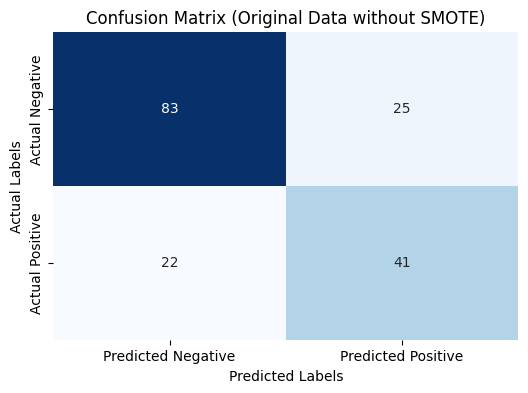

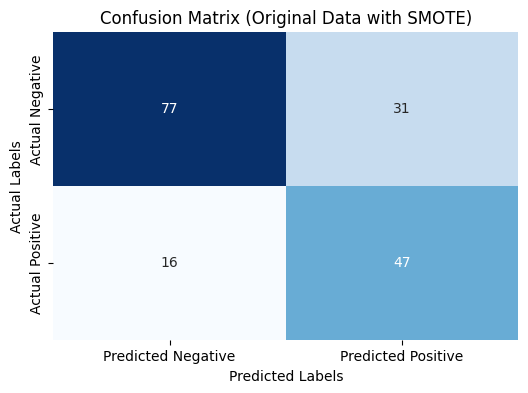

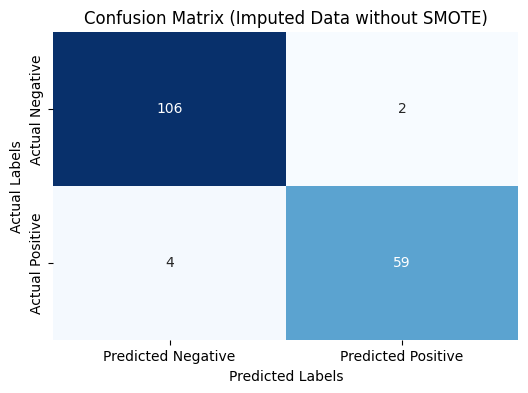

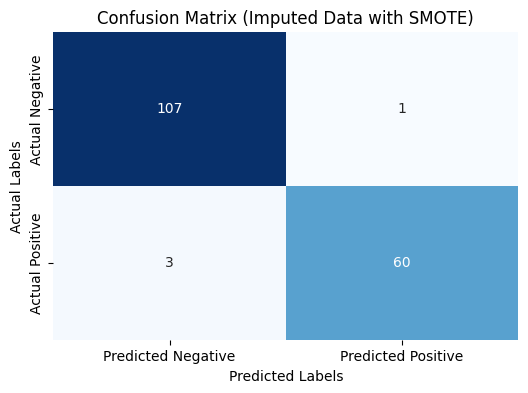

In [28]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("Actual Labels")
    plt.title(title)
    plt.show()

# --- 1. Original Data (without SMOTE) ---
plot_confusion_matrix(y_test_original, y_pred_original, title="Confusion Matrix (Original Data without SMOTE)")

# --- 2. Original Data (with SMOTE) ---
plot_confusion_matrix(y_test_original, y_pred_original_smote, title="Confusion Matrix (Original Data with SMOTE)")

# --- 3. Imputed Data (without SMOTE) ---
plot_confusion_matrix(y_test_imputed, y_pred_imputed, title="Confusion Matrix (Imputed Data without SMOTE)")

# --- 4. Imputed Data (with SMOTE) ---
plot_confusion_matrix(y_test_imputed, y_pred_imputed_smote, title="Confusion Matrix (Imputed Data with SMOTE)")


<h2>Hyperparameter Tuning</h2>

In [29]:
param_grid = {
    'n_estimators': [50, 100, 150,200],
    'learning_rate': [0.1, 0.5, 1.0, 1.5],
    'algorithm':['SAMME']
}

In [30]:
def tune_and_evaluate(X_train, y_train, X_test, y_test, dataset_description):
    print(f"Hyperparameter Tuning and Evaluation for {dataset_description}...\n")

    grid_search = GridSearchCV(
        estimator=AdaBoostClassifier(random_state=42),
        param_grid=param_grid,
        scoring='recall',  # For recall
        cv=5,
        verbose=2,
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)
    print(f"\nClassification Report ({dataset_description}):\n")
    print(classification_report(y_test, y_pred))

    return best_model  # Return the best model



In [31]:
# --- 1. Original Data (without SMOTE) ---
y_pred_original_tuned = tune_and_evaluate(
    X_train_original, y_train_original, X_test_original, y_test_original, 
    "Original Data (without SMOTE)"
)

Hyperparameter Tuning and Evaluation for Original Data (without SMOTE)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Classification Report (Original Data (without SMOTE)):

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       108
           1       0.62      0.63      0.63        63

    accuracy                           0.73       171
   macro avg       0.71      0.71      0.71       171
weighted avg       0.73      0.73      0.73       171



In [32]:
# --- 2. Original Data (with SMOTE) ---
y_pred_original_smote_tuned = tune_and_evaluate(
    X_train_original_smote, y_train_original_smote, X_test_original, y_test_original, 
    "Original Data (with SMOTE)"
)

Hyperparameter Tuning and Evaluation for Original Data (with SMOTE)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Classification Report (Original Data (with SMOTE)):

              precision    recall  f1-score   support

           0       0.83      0.69      0.76       108
           1       0.59      0.76      0.67        63

    accuracy                           0.72       171
   macro avg       0.71      0.73      0.71       171
weighted avg       0.74      0.72      0.72       171



In [33]:
# --- 3. Imputed Data (without SMOTE) ---
y_pred_imputed_tuned = tune_and_evaluate(
    X_train_imputed, y_train_imputed, X_test_imputed, y_test_imputed, 
    "Imputed Data (without SMOTE)"
)

Hyperparameter Tuning and Evaluation for Imputed Data (without SMOTE)...

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Classification Report (Imputed Data (without SMOTE)):

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
# --- 4. Imputed Data (with SMOTE) ---
X_train_imputed_smote, y_train_imputed_smote = smote.fit_resample(X_train_imputed, y_train_imputed)
y_pred_imputed_smote_tuned = tune_and_evaluate(
    X_train_imputed_smote, y_train_imputed_smote, X_test_imputed, y_test_imputed, 
    "Imputed Data (with SMOTE)"
)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder

def plot_roc_curve(y_test, y_pred_prob, dataset_description):

    # Convert string labels to numeric (B = 0, M = 1)
    #label_encoder = LabelEncoder()
    #y_test_numeric = label_encoder.fit_transform(y_test_original)  # Apply the same transformation to y_test

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {dataset_description}')
    plt.legend(loc='lower right')
    plt.show()

<h2>ROC Curve</h2>

In [ ]:
# --- 1. Original Data (without SMOTE) ---
y_pred_prob_original = y_pred_original_tuned.predict_proba(X_test_original)[:, 1]
plot_roc_curve(y_test_original, y_pred_prob_original, "Original Data without SMOTE")

In [ ]:
# --- 2. Original Data (with SMOTE) ---
y_pred_prob_original_smote = y_pred_original_smote_tuned.predict_proba(X_test_original)[:, 1]
plot_roc_curve(y_test_original, y_pred_prob_original_smote, "Original Data with SMOTE")

In [ ]:
# --- 3. Imputed Data (without SMOTE) ---
y_pred_prob_imputed = y_pred_imputed_tuned.predict_proba(X_test_imputed)[:, 1]
plot_roc_curve(y_test_imputed, y_pred_prob_imputed, "Imputed Data without SMOTE")

In [ ]:
# --- 4. Imputed Data (with SMOTE) ---
y_pred_prob_imputed_smote = y_pred_imputed_smote_tuned.predict_proba(X_test_imputed)[:, 1]
plot_roc_curve(y_test_imputed, y_pred_prob_imputed_smote, "Imputed Data with SMOTE")

<h4>Imputed Data (without SMOTE) is the Best model among all

<h3>Saving the Model as SAV

In [ ]:
import pickle

accuracy = accuracy_score(y_test_imputed, y_pred_imputed)
precision = precision_score(y_test_imputed, y_pred_imputed, average='binary')
f1 = f1_score(y_test_imputed, y_pred_imputed, average='binary')

filename = 'best_tune_model.sav'
model_data = {
    'scaler': scaler,
    'model': y_pred_imputed_tuned,
    'metrics': {
        'accuracy': accuracy,
        'precision': precision,
        'f1_score': f1
    }
}

#Save the dictionary to a file
pickle.dump(model_data, open(filename, 'wb'))
print(f"Model, scaler, and metrics saved to {filename}")